# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [3]:
# Formative Assigment: Advanced Linear Algebra (PCA)
# African countries - Cost Of Healthy Diet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
#Step 0: Loading and preparing the data filtering the African Countries
data_path = "/content/price_of_healthy_diet_clean.csv"

df = pd.read_csv(data_path)

african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
    'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo',
    "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt',
    'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
    'Zambia', 'Zimbabwe'
]

# Filter only African countries
df_africa = df[df['country'].isin(african_countries)].copy()

# Select only numeric columns (remove Country, Year, etc.)
numeric_cols = df_africa.select_dtypes(include=np.number).columns

# Drop columns that are entirely NaN, as they cause issues in PCA
# This identifies columns where all values are NaN
all_nan_cols = df_africa[numeric_cols].columns[df_africa[numeric_cols].isnull().all()].tolist()

# Create a new DataFrame excluding these all-NaN columns
df_processed = df_africa[numeric_cols].drop(columns=all_nan_cols)

# Drop rows with any remaining NaN values to ensure a clean dataset for PCA
df_processed = df_processed.dropna()

data = df_processed.to_numpy().astype(float)

print("Original data shape:", data.shape)
print("Number of features:", data.shape[1])

Original data shape: (50, 7)
Number of features: 7


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

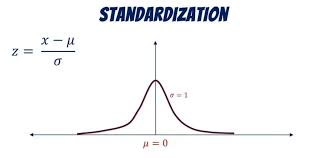


In [17]:
# Step 1: Loading and Standardizing the data (using numpy only)

# Calculation of  mean and standard deviation along columns (axis=0)
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)

# Avoid division by zero (very small std → replace with 1)
data_std[data_std == 0] = 1

# Standardize
standardized_data = (data - data_mean) / data_std

# Displaying of  first 5 rows
print("First 5 rows of standardized data:")
print(standardized_data[:5])

First 5 rows of standardized data:
[[-1.76116255  0.          2.10634385  2.10634385  0.26252051  3.10844686
   2.02146059]
 [-1.71301705  0.          1.28640031  1.28640031 -0.78756153  1.43569717
   0.25366468]
 [-0.99083448  0.         -1.08232547 -1.08232547 -0.30002344 -0.42822392
  -0.47590188]
 [-1.52043503  0.         -0.30793435 -0.30793435 -0.26252051 -0.09367398
  -0.25141986]
 [ 1.61704701  0.         -1.31008757 -1.31008757 -0.30002344 -0.28484538
  -0.39172112]]


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [18]:
# Step 3: Calculation of  the Covariance Matrix
# Using unbiased estimator: divide by (n-1)

n_samples = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)

print("Covariance matrix shape:", cov_matrix.shape)
print("\nCovariance matrix (first 5×5 block):")
print(cov_matrix[:5, :5])

Covariance matrix shape: (7, 7)

Covariance matrix (first 5×5 block):
[[ 1.02040816  0.         -0.18196376 -0.18196376 -0.02814951]
 [ 0.          0.          0.          0.          0.        ]
 [-0.18196376  0.          1.02040816  1.02040816  0.51302772]
 [-0.18196376  0.          1.02040816  1.02040816  0.51302772]
 [-0.02814951  0.          0.51302772  0.51302772  1.02040816]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [19]:
# Step 4: Performing the Eigendecomposition

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Making  sure all have real values (numerical stability)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

print("Eigenvalues (first 10):")
print(eigenvalues[:10])
print("\nEigenvectors shape:", eigenvectors.shape)

Eigenvalues (first 10):
[ 3.61512438e+00  1.06360677e+00  8.77531015e-01  5.66186811e-01
 -1.91732057e-16  1.28678788e-16  0.00000000e+00]

Eigenvectors shape: (7, 7)


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [21]:
# Step 5: Sorting Principal Components
# Sorting eigenvalues in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]          # descending order

sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted eigenvalues (first 10):")
print(np.round(sorted_eigenvalues[:10], 6))

print("\nTop eigenvector (PC1):")
print(np.round(sorted_eigenvectors[:,0], 4))

Sorted eigenvalues (first 10):
[ 3.615124  1.063607  0.877531  0.566187  0.        0.       -0.      ]

Top eigenvector (PC1):
[ 0.1083  0.     -0.4898 -0.4898 -0.3669 -0.3663 -0.4896]


In [22]:
# Explained variance calculation needed for choosing components

explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Choose number of components that explain at least 95% variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Explained variance ratio (first 8 PCs):")
print(np.round(explained_variance_ratio[:8], 4))

print(f"\nCumulative variance (first 8 PCs):")
print(np.round(cumulative_variance[:8], 4))

print(f"\nNumber of components needed for ≥ 95% variance: {num_components}")
print(f"→ Variance explained: {cumulative_variance[num_components-1]:.4f}")

Explained variance ratio (first 8 PCs):
[ 0.5905  0.1737  0.1433  0.0925  0.      0.     -0.    ]

Cumulative variance (first 8 PCs):
[0.5905 0.7642 0.9075 1.     1.     1.     1.    ]

Number of components needed for ≥ 95% variance: 4
→ Variance explained: 1.0000


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [24]:
# Step 6: Project Data onto Principal Components

# Only take the first num_components eigenvectors
projection_matrix = sorted_eigenvectors[:, :num_components]

# Project the standardized data
reduced_data = standardized_data @ projection_matrix

print(f"Reduced data shape: {reduced_data.shape}")
print("\nFirst 5 rows of reduced data:")
print(np.round(reduced_data[:5], 4))

Reduced data shape: (50, 4)

First 5 rows of reduced data:
[[-4.4788  2.1105  0.8934 -0.6938]
 [-1.8069  2.3197  0.4913  0.3203]
 [ 1.4529  0.7201 -0.8007 -0.7443]
 [ 0.3907  1.3082 -0.8169 -0.3329]
 [ 1.8647 -1.3749  0.7387 -0.6777]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [25]:
# Step 7: Output of the Reduced Data

print(f'Reduced Data Shape: {reduced_data.shape}')
print("\nFirst 5 rows of reduced data:")
print(np.round(reduced_data[:5], 4))

Reduced Data Shape: (50, 4)

First 5 rows of reduced data:
[[-4.4788  2.1105  0.8934 -0.6938]
 [-1.8069  2.3197  0.4913  0.3203]
 [ 1.4529  0.7201 -0.8007 -0.7443]
 [ 0.3907  1.3082 -0.8169 -0.3329]
 [ 1.8647 -1.3749  0.7387 -0.6777]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

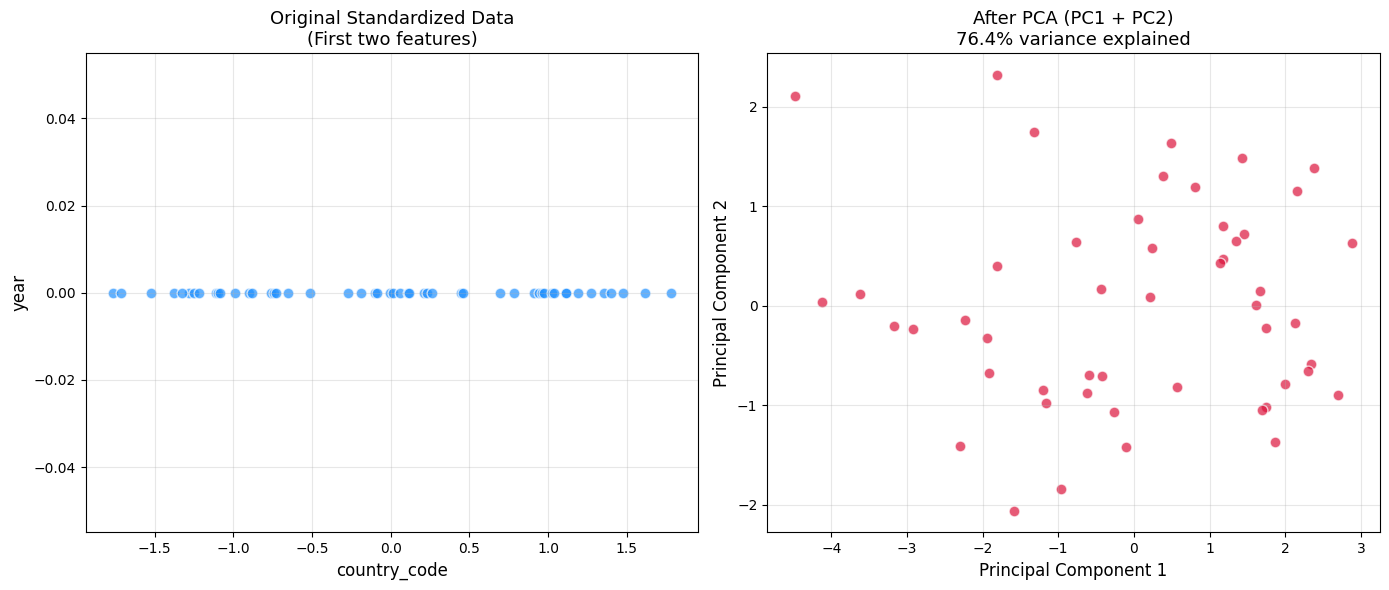

In [26]:
# Step 8: Visualization Before and After PCA

plt.figure(figsize=(14, 6))

# Before PCA — pick two original features (usually the first two after cleaning)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1],
            c='dodgerblue', alpha=0.7, edgecolor='white', s=60)
plt.xlabel(numeric_cols[0], fontsize=12)
plt.ylabel(numeric_cols[1], fontsize=12)
plt.title("Original Standardized Data\n(First two features)", fontsize=13)
plt.grid(True, alpha=0.3)

# After PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            c='crimson', alpha=0.7, edgecolor='white', s=60)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title(f"After PCA (PC1 + PC2)\n{explained_variance_ratio[0]+explained_variance_ratio[1]:.1%} variance explained",
          fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

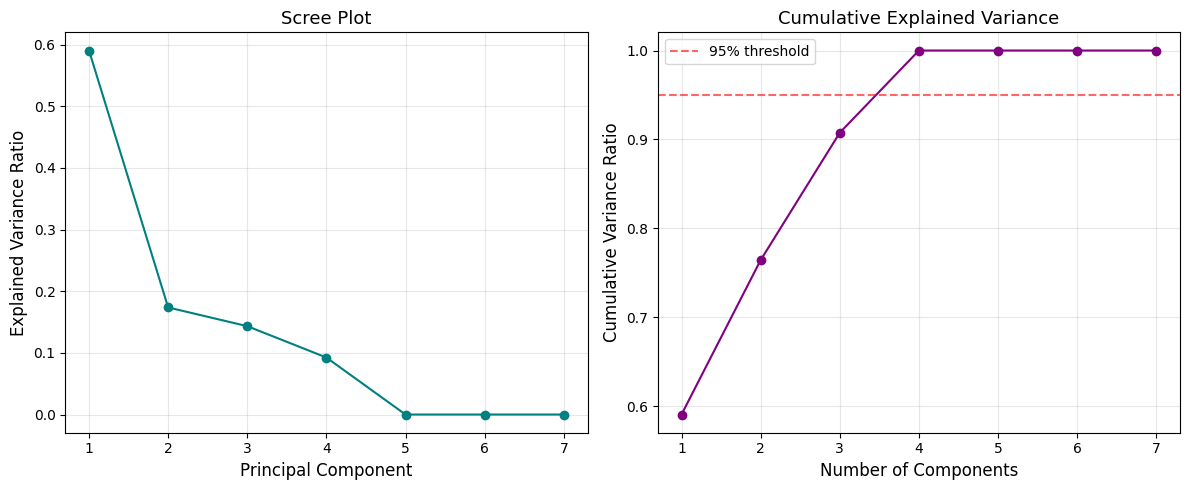

In [27]:
# Scree plot & cumulative variance to helps demonstrates deeper understanding

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio)+1),
         explained_variance_ratio, 'o-', color='teal')
plt.title("Scree Plot", fontsize=13)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance, 'o-', color='purple')
plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.6, label='95% threshold')
plt.title("Cumulative Explained Variance", fontsize=13)
plt.xlabel("Number of Components", fontsize=12)
plt.ylabel("Cumulative Variance Ratio", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()